In [118]:
%matplotlib notebook

In [142]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas import DataFrame
import json
from datetime import datetime

In [143]:
# load covid variants dataset
variants_df = pd.read_csv('covid-variants.csv')

# This data set has location as filed name so renamed the location field name to country
variants_df.rename(columns={'location':'country'},inplace=True)

# Filtering the records belongs to 6 countries
countries_6_variants_df = variants_df.loc[variants_df['country'].isin(['United States','Canada','Germany','India','Japan','Sweden'])]

# In the df date is defined as on object so converting into datetime64 
# Because datasets will be joined by country and date fields
countries_6_variants_df['date'] = countries_6_variants_df['date'].astype('datetime64[ns]')

# Displaying the first five records
countries_6_variants_df.head()


C:\Users\radgu\AppData\Local\Temp\ipykernel_6992\2858229217.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_6_variants_df['date'] = countries_6_variants_df['date'].astype('datetime64[ns]')


,country,date,variant,num_sequences,perc_sequences,num_sequences_total
13344,Canada,2020-05-11,Alpha,0,0.0,903
13345,Canada,2020-05-11,B.1.1.277,0,0.0,903
13346,Canada,2020-05-11,B.1.1.302,0,0.0,903
13347,Canada,2020-05-11,B.1.1.519,0,0.0,903
13348,Canada,2020-05-11,B.1.160,0,0.0,903


In [144]:
countries_6_variants_df.count()

country                6360
date                   6360
variant                6360
num_sequences          6360
perc_sequences         6360
num_sequences_total    6360
dtype: int64

In [145]:
countries_6_variants_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6360 entries, 13344 to 97847
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   country              6360 non-null   object        
 1   date                 6360 non-null   datetime64[ns]
 2   variant              6360 non-null   object        
 3   num_sequences        6360 non-null   int64         
 4   perc_sequences       6360 non-null   float64       
 5   num_sequences_total  6360 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 347.8+ KB


In [146]:
# Load face covering policies dataset
face_covering_df = pd.read_csv('face-covering-policies-covid.csv')

# Rename entity field as country and day as date
face_covering_df.rename(columns={'Entity':'country','Day':'date'},inplace=True)

# Filter only six countries
countries_6_face_covering_df = face_covering_df.loc[face_covering_df['country'].isin(['United States','Canada','Germany','India','Japan','Sweden'])]

# In the df date is defined as on object so converting into datetime64 
# Because datasets will be joined by country and date fields
countries_6_face_covering_df['date'] = countries_6_face_covering_df['date'].astype('datetime64[ns]')


countries_6_face_covering_df.head(20)




C:\Users\radgu\AppData\Local\Temp\ipykernel_6992\3505189513.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_6_face_covering_df['date'] = countries_6_face_covering_df['date'].astype('datetime64[ns]')


,country,Code,date,facial_coverings
22658,Canada,CAN,2020-01-01,0
22659,Canada,CAN,2020-01-02,0
22660,Canada,CAN,2020-01-03,0
22661,Canada,CAN,2020-01-04,0
22662,Canada,CAN,2020-01-05,0
22663,Canada,CAN,2020-01-06,0
22664,Canada,CAN,2020-01-07,0
22665,Canada,CAN,2020-01-08,0
22666,Canada,CAN,2020-01-09,0
22667,Canada,CAN,2020-01-10,0


In [147]:
countries_6_face_covering_df.count()

country             4562
Code                4562
date                4562
facial_coverings    4562
dtype: int64

In [149]:
#Combine covid variant data with facecovering data set into a single dataset using country and date fields
combined_dataset = pd.merge(countries_6_face_covering_df,countries_6_variants_df,how='left',on=['country','date'])

# Display the info
#combined_dataset.info()

# Display the data table for preview
combined_dataset.head(20)


,country,Code,date,facial_coverings,variant,num_sequences,perc_sequences,num_sequences_total
0,Canada,CAN,2020-01-01,0,NaN,NaN,NaN,NaN
1,Canada,CAN,2020-01-02,0,NaN,NaN,NaN,NaN
2,Canada,CAN,2020-01-03,0,NaN,NaN,NaN,NaN
3,Canada,CAN,2020-01-04,0,NaN,NaN,NaN,NaN
4,Canada,CAN,2020-01-05,0,NaN,NaN,NaN,NaN
5,Canada,CAN,2020-01-06,0,NaN,NaN,NaN,NaN
6,Canada,CAN,2020-01-07,0,NaN,NaN,NaN,NaN
7,Canada,CAN,2020-01-08,0,NaN,NaN,NaN,NaN
8,Canada,CAN,2020-01-09,0,NaN,NaN,NaN,NaN
9,Canada,CAN,2020-01-10,0,NaN,NaN,NaN,NaN


In [150]:
# This is my final dataset after dropping bad records with NaN values
combined_df_final = combined_dataset.dropna()
combined_df_final.head(20)

,country,Code,date,facial_coverings,variant,num_sequences,perc_sequences,num_sequences_total
131,Canada,CAN,2020-05-11,1,Alpha,0.0,0.0,903.0
132,Canada,CAN,2020-05-11,1,B.1.1.277,0.0,0.0,903.0
133,Canada,CAN,2020-05-11,1,B.1.1.302,0.0,0.0,903.0
134,Canada,CAN,2020-05-11,1,B.1.1.519,0.0,0.0,903.0
135,Canada,CAN,2020-05-11,1,B.1.160,0.0,0.0,903.0
136,Canada,CAN,2020-05-11,1,B.1.177,0.0,0.0,903.0
137,Canada,CAN,2020-05-11,1,B.1.221,0.0,0.0,903.0
138,Canada,CAN,2020-05-11,1,B.1.258,0.0,0.0,903.0
139,Canada,CAN,2020-05-11,1,B.1.367,0.0,0.0,903.0
140,Canada,CAN,2020-05-11,1,B.1.620,0.0,0.0,903.0


In [128]:
combined_df_final.count()

country                6360
Code                   6360
date                   6360
facial_coverings       6360
variant                6360
num_sequences          6360
perc_sequences         6360
num_sequences_total    6360
dtype: int64

In [129]:
# Framinf the date range
A = '2020-01-01'
B = '2021-12-31'
#data_truncated = combined_df_final.loc[(combined_df_final['date'] >= A) & (combined_df_final['date'] <= B)]
#data_truncated.head(20)
#data_truncated.count()



In [151]:
#What is the count of variants in different locations ?
#group_data = data_truncated.groupby('facial_coverings')
#group_data.head()
#group_data.count()

<IPython.core.display.Javascript object>


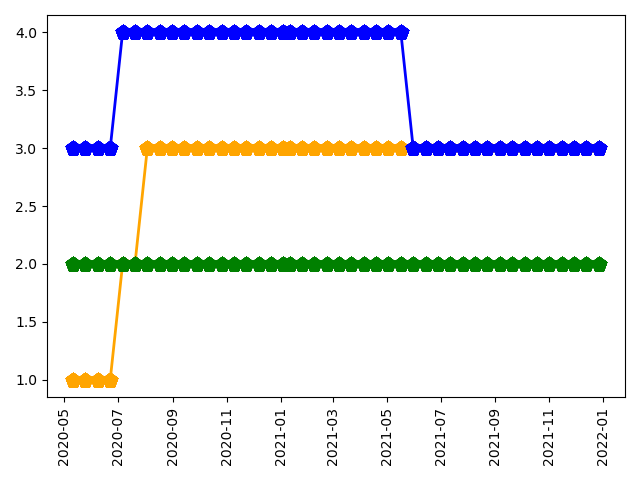

In [152]:
canada_df = data_truncated.loc[data_truncated['country'].isin(['Canada'])]
canada_df_grouped = canada_df.groupby(['date','facial_coverings'])
x_axis = canada_df[['facial_coverings']]
dates = canada_df[['date']]
plt.xticks(rotation=90)
plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="orange")

#US data plot
us_df = data_truncated.loc[data_truncated['country'].isin(['United States'])]
us_df_grouped = us_df.groupby(['date','facial_coverings'])
x_axis = us_df['facial_coverings']
dates = us_df['date']

plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="blue")

#Germany data plot
germany_df = data_truncated.loc[data_truncated['country'].isin(['Germany'])]
germany_df_grouped = germany_df.groupby(['date','facial_coverings'])
x_axis = germany_df['facial_coverings']
dates = germany_df['date']

plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="green")

plt.tight_layout()
plt.show()